Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Attribute Information
1.	Age: age of the patient [years]
2.	Sex: sex of the patient [M: Male, F: Female]
3.	ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4.	RestingBP: resting blood pressure [mm Hg]
5.	Cholesterol: serum cholesterol [mm/dl]
6.	FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7.	RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8.	MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9.	ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10.	Oldpeak: oldpeak = ST [Numeric value measured in depression]
11.	ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12.	HeartDisease: output class [1: heart disease, 0: Normal]



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [9]:
#Checking for outliers 
plt.figure(figsize= [15,5])
sns.boxplot(data = df)
plt.style.use('ggplot')
plt.grid()

In [10]:
for i in df.columns:
    if df[i].dtype == 'O':
        continue
    else:
        # Calculate the mean and standard deviation of the dataset
        mean = np.mean(df[i])
        std_dev = np.std(df[i])
        
        # Calculate the z-score for each data point
        z_scores = [(x - mean) / std_dev for x in df[i]]
        
        # Define the threshold for identifying potential outliers
        threshold = 3

        # Identify any data points that have a z-score that falls outside of the threshold
        potential_outliers = [x for x in df[i] if abs((x - mean) / std_dev) > threshold]

        # Print the results
        print("Column_name : ",i)
        print("Potential outliers:", potential_outliers)

Column_name :  Age
Potential outliers: []
Column_name :  RestingBP
Potential outliers: [190, 200, 200, 200, 0, 190, 200, 192]
Column_name :  Cholesterol
Potential outliers: [529, 603, 564]
Column_name :  FastingBS
Potential outliers: []
Column_name :  MaxHR
Potential outliers: [60]
Column_name :  Oldpeak
Potential outliers: [5.0, -2.6, 4.2, 5.6, 4.2, 6.2, 4.4]
Column_name :  HeartDisease
Potential outliers: []


In [11]:
for i in df.columns:
    if df[i].dtype == 'O':
        continue
    else:
        # Calculate the first quartile, third quartile, and IQR of the dataset
        q1, q3 = np.percentile(df[i], [25, 75])
        iqr = q3 - q1

        # Define the lower threshold and upper threshold for identifying potential outliers
        lower_threshold = q1 - 1.5 * iqr
        upper_threshold = q3 + 1.5 * iqr

        # Identify any data points that fall below the lower threshold or above the upper threshold
        potential_outliers = [x for x in df[i] if x < lower_threshold or x > upper_threshold]

        # Print the results
        print("Column_name : ",i)
        print("Potential outliers:", potential_outliers)        

Column_name :  Age
Potential outliers: []
Column_name :  RestingBP
Potential outliers: [190, 180, 180, 180, 200, 180, 180, 180, 80, 200, 185, 200, 180, 180, 0, 178, 172, 180, 190, 174, 178, 180, 200, 192, 178, 180, 180, 172]
Column_name :  Cholesterol
Potential outliers: [468, 518, 412, 529, 466, 603, 491, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 458, 0, 0, 0, 0, 0, 0, 564, 417, 409]
Column_name :  FastingBS
Potential outliers: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [12]:
for i in df.columns:
    if df[i].dtype != 'O':
        continue
    else:
        print("Column name : {} , Unique_values : {} , No_of_unique_values : {}".format(i,df[i].unique(),df[i].nunique()))

Column name : Sex , Unique_values : ['M' 'F'] , No_of_unique_values : 2
Column name : ChestPainType , Unique_values : ['ATA' 'NAP' 'ASY' 'TA'] , No_of_unique_values : 4
Column name : RestingECG , Unique_values : ['Normal' 'ST' 'LVH'] , No_of_unique_values : 3
Column name : ExerciseAngina , Unique_values : ['N' 'Y'] , No_of_unique_values : 2
Column name : ST_Slope , Unique_values : ['Up' 'Flat' 'Down'] , No_of_unique_values : 3


In [13]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

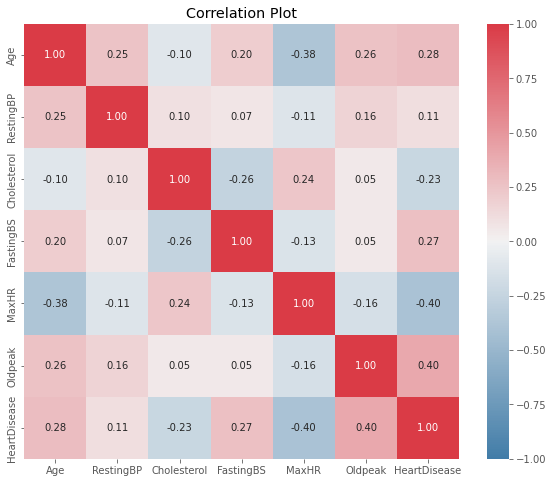

In [14]:
#Finding correlation between features
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), cmap=sns.diverging_palette(240, 10, as_cmap=True),
            annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, square=True, ax=ax)

# Add title to the plot
ax.set_title('Correlation Plot')

# Show the plot
plt.show()

In [15]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [16]:
print(df['Age'].min())
print(df['Age'].max())

28
77


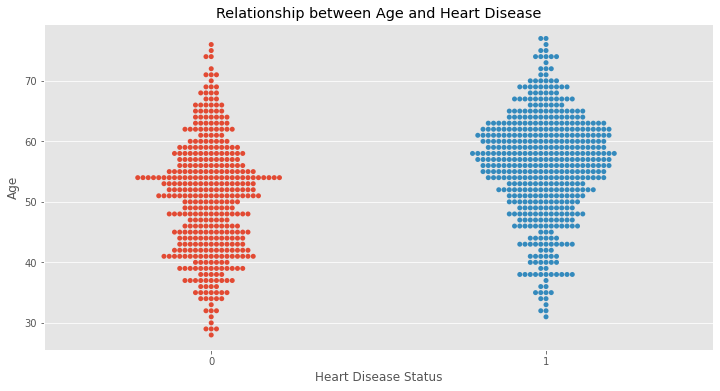

In [17]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x=df['HeartDisease'], y=df['Age'], data=df)
plt.xlabel('Heart Disease Status')
plt.ylabel('Age')
plt.title('Relationship between Age and Heart Disease')
plt.show()

In [18]:
#Feature Engineering
for i in df.columns:
    if df[i].dtype != "O":
        continue
    elif df[i].nunique() > 2:
        continue
    else:
        print("Column name : {} , Unique_Values : {}".format(i,df[i].unique()))

Column name : Sex , Unique_Values : ['M' 'F']
Column name : ExerciseAngina , Unique_Values : ['N' 'Y']


In [19]:
df['Sex'] = df['Sex'].replace({'M': 1, 'F': 0})
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'Y': 1, 'N': 0})

In [20]:
df.head()

Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   40    1           ATA        140          289          0     Normal   
1   49    0           NAP        160          180          0     Normal   
2   37    1           ATA        130          283          0         ST   
3   48    0           ASY        138          214          0     Normal   
4   54    1           NAP        150          195          0     Normal   

   MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172               0      0.0       Up             0  
1    156               0      1.0     Flat             1  
2     98               0      0.0       Up             0  
3    108               1      1.5     Flat             1  
4    122               0      0.0       Up             0

In [21]:
for i in df.columns:
    if df[i].dtype != "O":
        continue
    else:
         print("Column name : {} , Unique_Values : {}".format(i,df[i].unique()))

Column name : ChestPainType , Unique_Values : ['ATA' 'NAP' 'ASY' 'TA']
Column name : RestingECG , Unique_Values : ['Normal' 'ST' 'LVH']
Column name : ST_Slope , Unique_Values : ['Up' 'Flat' 'Down']


In [22]:
encoded_df = pd.get_dummies(df, columns=['ChestPainType','RestingECG','ST_Slope'])

In [23]:
encoded_df

Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0     40    1        140          289          0    172               0   
1     49    0        160          180          0    156               0   
2     37    1        130          283          0     98               0   
3     48    0        138          214          0    108               1   
4     54    1        150          195          0    122               0   
..   ...  ...        ...          ...        ...    ...             ...   
913   45    1        110          264          0    132               0   
914   68    1        144          193          1    141               0   
915   57    1        130          131          0    115               1   
916   57    0        130          236          0    174               0   
917   38    1        138          175          0    173               0   

     Oldpeak  HeartDisease  ChestPainType_ASY  ChestPainType_ATA  \
0        0.0             0                  0                  1   
1        1.0             1                  0                  0   
2        0.0             0                  0                  1   
3        1.5             1                  1                  0   
4        0.0             0                  0                  0   
..       ...           ...                ...                ...   
913      1.2             1                  0                  0   
914      3.4             1                  1                  0   
915      1.2             1                  1                  0   
916      0.0             1                  0                  1   
917      0.0             0                  0                  0   

     ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  \
0                    0                 0               0                  1   
1                    1                 0               0                  1   
2                    0                 0               0                  0   
3                    0                 0               0                  1   
4                    1                 0               0                  1   
..                 ...               ...             ...                ...   
913                  0                 1               0                  1   
914                  0                 0               0                  1   
915                  0                 0               0                  1   
916                  0                 0               1                  0   
917                  1                 0               0                  1   

     RestingECG_ST  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0                0              0              0            1  
1                0              0              1            0  
2                1              0              0            1  
3                0              0              1            0  
4                0              0              0            1  
..             ...            ...            ...          ...  
913              0              0              1            0  
914              0              0              1            0  
915              0              0              1            0  
916              0              0              1            0  
917              0              0              0            1  

[918 rows x 19 columns]

In [24]:
df=encoded_df

In [25]:
df

Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0     40    1        140          289          0    172               0   
1     49    0        160          180          0    156               0   
2     37    1        130          283          0     98               0   
3     48    0        138          214          0    108               1   
4     54    1        150          195          0    122               0   
..   ...  ...        ...          ...        ...    ...             ...   
913   45    1        110          264          0    132               0   
914   68    1        144          193          1    141               0   
915   57    1        130          131          0    115               1   
916   57    0        130          236          0    174               0   
917   38    1        138          175          0    173               0   

     Oldpeak  HeartDisease  ChestPainType_ASY  ChestPainType_ATA  \
0        0.0             0                  0                  1   
1        1.0             1                  0                  0   
2        0.0             0                  0                  1   
3        1.5             1                  1                  0   
4        0.0             0                  0                  0   
..       ...           ...                ...                ...   
913      1.2             1                  0                  0   
914      3.4             1                  1                  0   
915      1.2             1                  1                  0   
916      0.0             1                  0                  1   
917      0.0             0                  0                  0   

     ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  \
0                    0                 0               0                  1   
1                    1                 0               0                  1   
2                    0                 0               0                  0   
3                    0                 0               0                  1   
4                    1                 0               0                  1   
..                 ...               ...             ...                ...   
913                  0                 1               0                  1   
914                  0                 0               0                  1   
915                  0                 0               0                  1   
916                  0                 0               1                  0   
917                  1                 0               0                  1   

     RestingECG_ST  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0                0              0              0            1  
1                0              0              1            0  
2                1              0              0            1  
3                0              0              1            0  
4                0              0              0            1  
..             ...            ...            ...          ...  
913              0              0              1            0  
914              0              0              1            0  
915              0              0              1            0  
916              0              0              1            0  
917              0              0              0            1  

[918 rows x 19 columns]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   ExerciseAngina     918 non-null    int64  
 7   Oldpeak            918 non-null    float64
 8   HeartDisease       918 non-null    int64  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ST_Slope_Down      918 non

In [27]:
df = df.astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                918 non-null    int32
 1   Sex                918 non-null    int32
 2   RestingBP          918 non-null    int32
 3   Cholesterol        918 non-null    int32
 4   FastingBS          918 non-null    int32
 5   MaxHR              918 non-null    int32
 6   ExerciseAngina     918 non-null    int32
 7   Oldpeak            918 non-null    int32
 8   HeartDisease       918 non-null    int32
 9   ChestPainType_ASY  918 non-null    int32
 10  ChestPainType_ATA  918 non-null    int32
 11  ChestPainType_NAP  918 non-null    int32
 12  ChestPainType_TA   918 non-null    int32
 13  RestingECG_LVH     918 non-null    int32
 14  RestingECG_Normal  918 non-null    int32
 15  RestingECG_ST      918 non-null    int32
 16  ST_Slope_Down      918 non-null    int32
 17  ST_Slope_Flat   

In [29]:
X = df.drop('HeartDisease',axis=1)
y = df.HeartDisease

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier

In [32]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('lr_classifier',LogisticRegression())])

In [33]:
pipeline_dt=Pipeline([('scalar1',StandardScaler()),
                     ('dt_classifier',DecisionTreeClassifier())])

In [34]:
pipeline_rf=Pipeline([('scalar1',StandardScaler()),
                     ('rf_classifier',RandomForestClassifier())])

In [35]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf]

In [40]:
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest'}

In [41]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [45]:
for i,model in enumerate(pipelines):
    print("{} Accuracy score: {}".format(pipe_dict[i],accuracy_score(y_test, model.predict(X_test))))
    print(f'The recall_score is : {recall_score(y_test, model.predict(X_test))}')  
    print(f'The f1_score is : {f1_score(y_test, model.predict(X_test))}') 
    print(f'The precision_score is : {precision_score(y_test, model.predict(X_test))}')    

Logistic Regression Accuracy score: 0.8315217391304348
The recall_score is : 0.8556701030927835
The f1_score is : 0.8426395939086294
The precision_score is : 0.83
Decision Tree Accuracy score: 0.7717391304347826
The recall_score is : 0.7731958762886598
The f1_score is : 0.78125
The precision_score is : 0.7894736842105263
Random Forest Accuracy score: 0.8586956521739131
The recall_score is : 0.865979381443299
The f1_score is : 0.8659793814432989
The precision_score is : 0.865979381443299


In [46]:
for i,model in enumerate(pipelines):
    print("{} r2 score: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression r2 score: 0.8315217391304348
Decision Tree r2 score: 0.7717391304347826
Random Forest r2 score: 0.8586956521739131


In [47]:
accuracy_score(y_test, pipeline_lr.predict(X_test))

0.8315217391304348

<AxesSubplot:>

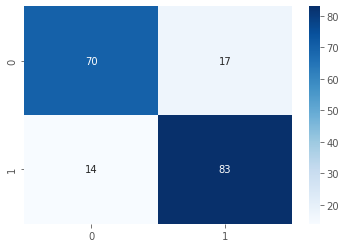

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pipeline_lr.predict(X_test))
sns.heatmap(cm, annot=True, cmap="Blues")